# importing an OpenAI Gym game

## install required packages

In [ ]:
# install tensorflow for deep learning
# gym and gym[atari] for games
# keras rl2 for reinforcement learning algorithms
!pip install tensorflow gym keras-rl2 gym[atari]

     |████████████████████████████████| 52 kB 716 kB/s 
     |████████████████████████████████| 462 kB 25.7 MB/s 


In [ ]:
import gym  # for games
import random  # to random actions
import matplotlib.pyplot as plt  # for visualization
import numpy as np  # to calculate numeric values

In [ ]:
# download and extract required ROM into the system
! wget http://www.atarimania.com/roms/Roms.rar  # download required ROM from the 'http://www.atarimania.com/roms/Roms.rar'
! mkdir /content/ROM/  # make directory
! unrar e /content/Roms.rar /content/ROM/  # unrar the target file
! python -m atari_py.import_roms /content/ROM/  # set the ROM to the system

--2022-04-21 16:06:30--  http://www.atarimania.com/roms/Roms.rar
Resolving www.atarimania.com (www.atarimania.com)... 195.154.81.199
Connecting to www.atarimania.com (www.atarimania.com)|195.154.81.199|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19583716 (19M) [application/x-rar-compressed]
Saving to: ‘Roms.rar’

Roms.rar            100%[===================>]  18.68M   474KB/s    in 42s     

2022-04-21 16:07:12 (458 KB/s) - ‘Roms.rar’ saved [19583716/19583716]


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Roms.rar

Extracting  /content/ROM/128 in 1 Game Select ROM (Unknown) ~.bin          0%  OK 
Extracting  /content/ROM/2 in 1 - Chess, Othello (Atari) (Prototype).bin       0%  OK 
Extracting  /content/ROM/2 Pak Special - Cavern Blaster, City War (1992) (HES) (773-867) (PAL).bin       0%  OK 
Extracting  /content/ROM/2 Pak Special - Challenge, Surfing (1990) (HES) (771-333) (PAL).b

## set up environment

In [ ]:
# make the environment (Atlantis)
env = gym.make('Atlantis-v0')

In [ ]:
# the meaning of all possible actions
env.unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'RIGHTFIRE', 'LEFTFIRE']

In [ ]:
# the input dimension of the game
height, width, channels = env.observation_space.shape
print('height: ', height)
print('width: ', width)
print('channels: ', channels)

height:  210
width:  160
channels:  3


In [ ]:
# numbers of actions
actions = env.action_space.n
print('actions: ', actions)

actions:  4


## play the game for 10 episodes randomly

Episode:1 Score:14600.0 Steps:1387
Episode:2 Score:9200.0 Steps:1090
Episode:3 Score:25400.0 Steps:2495
Episode:4 Score:30200.0 Steps:2426
Episode:5 Score:16200.0 Steps:1563
Episode:6 Score:24500.0 Steps:2535
Episode:7 Score:14900.0 Steps:1640
Episode:8 Score:12300.0 Steps:1344
Episode:9 Score:14700.0 Steps:1566
Episode:10 Score:7700.0 Steps:888


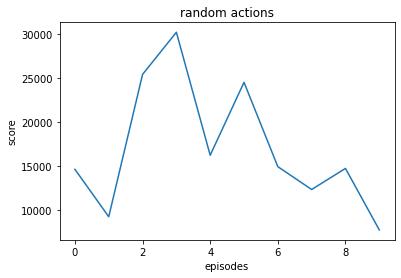

avg score:  16970.0
max score:  30200.0
min score:  7700.0


In [ ]:
episodes = 10  # define the episode to be 10
scores=[]  # list to record the reward of each episode
for episode in range(1, episodes+1):  # iterate the game for 10 episodes
    state = env.reset()  # reset the environment
    done = False  # boolean whether the game is done
    score = 0  # initial score
    n_step=0  # initial step
    while not done:  
      n_step+=1  # increase the step by 1
      action = random.choice(np.arange(actions))  # randomly pick the action
      n_state, reward, done, info = env.step(action)  # get the results from the environment
      score+=reward  # update the score
    # print out the results (episode, reward, and numbers of steps)
    print('Episode:{} Score:{} Steps:{}'.format(episode, score, n_step))  
    scores.append(score)  # record the reward into the score list
env.close()  # close the environment

# plotting the results
x = np.arange(episodes)  # x values (episodes)
y = scores  # y values (rewards)
plt.title("random actions")  # define title
plt.xlabel("episodes")  # define x lable
plt.ylabel("score")  # define y label
plt.plot(x,y)  # plot the graph
plt.show()  # display the graph

# print out the results
print('avg score: ', sum(scores)/len(scores))  # average reward
print('max score: ', max(scores))  # maximum reward
print('min score: ', min(scores))  # minimum reward

# creating a network and an dqn agent

## deep learning model

In [ ]:
# import required libraries
from tensorflow.keras.models import Sequential  # for deep learning model
from tensorflow.keras.layers import Dense, Flatten, Convolution2D  # type of layers used
from tensorflow.keras.optimizers import Adam  # type of optimizer used in the deep learning model

In [ ]:
def build_model(height, width, channels, actions):
    """
      Create a deep learning model
      Input:
        height: height of the input image (int)
        width: width of the input image (int)
        channels: channels of the input image (int)
        actions: numbers of possible actions in the game (int)
      Output:
        a deep learning model
    """
    model = Sequential()  # define the sequential model
    # CNN layers
    model.add(Convolution2D(16, (8,8), strides=(4,4), activation='relu', input_shape=(3,height, width, channels)))
    model.add(Convolution2D(32, (4,4), strides=(2,2), activation='relu'))
    model.add(Convolution2D(64, (3,3), activation='relu'))
    model.add(Flatten())
    # Normal nueron network layers
    model.add(Dense(512, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [ ]:
# create the model
model = build_model(height, width, channels, actions)

In [ ]:
# summarize the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 3, 51, 39, 16)     3088      
                                                                 
 conv2d_16 (Conv2D)          (None, 3, 24, 18, 32)     8224      
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 22, 16, 64)     18496     
                                                                 
 flatten_5 (Flatten)         (None, 67584)             0         
                                                                 
 dense_23 (Dense)            (None, 512)               34603520  
                                                                 
 dense_24 (Dense)            (None, 128)               65664     
                                                                 
 dense_25 (Dense)            (None, 32)               

## deep reinforcement learning agent

In [ ]:
# import required libraries
from rl.agents import DQNAgent  # DQN agent used as an agent
from rl.memory import SequentialMemory  # for manipulating system's memory
from rl.policy import EpsGreedyQPolicy  # policy used for the agent

In [ ]:
def build_agent(model, actions):
    """
      Create an agent used for playing the game
      Input:
        model: a deep learning model defined in the previous section
        actions: numbers of possible actions in the game (int)
      Output:
        An agent
    """
    policy = EpsGreedyQPolicy(eps=0.1)  # define a policy used in the agent
    memory = SequentialMemory(limit=1000, window_length=3)  # define system's memory limit
    # create a DQN agent with defined model, memory, policy, 
    # and enable dueling network for the agent to be more flexible when playing the game
    # set the warm up step to be 1000 (warm up before training the agent)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg', 
                   nb_actions=actions, nb_steps_warmup=1000
                  )
    return dqn

## train the dqn agent

In [ ]:
# import sys to deal with maximum recursion depth exceeded while calling a Python object
import sys
sys.setrecursionlimit(3000)

# creat an agent
dqn = build_agent(model, actions)

# compile and train the agent in the game's environment for 3000 iterations
dqn.compile(Adam(learning_rate=1e-4))  # used Adam optimizer and learning rate = 1e-4
dqn.fit(env, nb_steps=3000, visualize=False, verbose=1)

Training for 3000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 3000/10000 [========>.....................] - ETA: 2:18:49 - reward: 7.3000done, took 3569.345 seconds


# connecting of the game to the network and implementing the deep reinforcement learning model

In [ ]:
# deploy the trained agent in the game for 10 episodes
scores = dqn.test(env, nb_episodes=10, visualize=False)

# print out the results
print('avg score: ', np.mean(scores.history['episode_reward']))  # average reward
print('max score: ', np.max(scores.history['episode_reward']))  # maximum reward
print('min score: ', np.min(scores.history['episode_reward']))  # minimum reward

Testing for 10 episodes ...
Episode 1: reward: 19600.000, steps: 2077
Episode 2: reward: 13000.000, steps: 1826
Episode 3: reward: 16100.000, steps: 1882
Episode 4: reward: 15300.000, steps: 1783
Episode 5: reward: 25500.000, steps: 1924
Episode 6: reward: 17600.000, steps: 1820
Episode 7: reward: 17500.000, steps: 1638
Episode 8: reward: 32800.000, steps: 2515
Episode 9: reward: 12500.000, steps: 1286
Episode 10: reward: 14200.000, steps: 1744
avg score:  18410.0
max score:  32800.0
min score:  12500.0


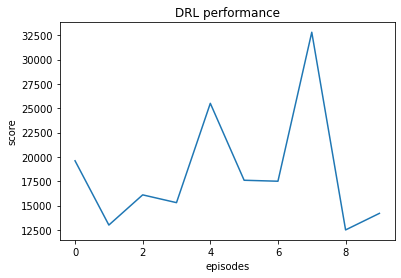

In [ ]:
# plotting the results
x = np.arange(10)  # x values (episodes)
y = scores.history['episode_reward']  # y values (rewards)
plt.title("DRL performance")  # define title
plt.xlabel("episodes")  # define x label
plt.ylabel("score")  # define y label
plt.plot(x,y)  # plot the graph
plt.show()  # display the graph